In [79]:
from standardInclude import *

In [80]:
bvs = ["minusPoint2",
      "minusPoint1",
       "original",
       "originalEnd",
       "plusPoint1",
       "plusPoint2"
      ]

In [81]:
bvs2 = ["Results_FW_28075_28082_AllScans.root",
      "Results_FW_28059_28066_AllScans.root",
       "Results_FW_28043_28050_AllScans.root",
       "Results_FW_28083_28090_AllScans.root",
       "Results_FW_28051_28058_AllScans.root",
       "Results_FW_28067_28074_AllScans.root"
      ]

In [94]:
calo = 20
xtal = 23
graphs = []

for fileString in bvs:
    filei = r.TFile("./filterWheel_GainCalibration/"+fileString+".root")
    #filei.ls()
    
    graphi = filei.Get("calo"+str(calo)+"xtal"+str(xtal)).Clone("calo"+str(calo)+"xtal"+str(xtal)+"_"+fileString)
    graphi.SetTitle("calo"+str(calo)+"xtal"+str(xtal)+"_"+fileString)
    #graphi.SetDirectory(0)
    graphs.append(graphi)
    
    filei.Close()
    
print(graphs)

[<ROOT.TGraphErrors object ("calo20xtal23_minusPoint2") at 0x7fffee3afe40>, <ROOT.TGraphErrors object ("calo20xtal23_minusPoint1") at 0x7fffedc30b00>, <ROOT.TGraphErrors object ("calo20xtal23_original") at 0x7fd8e159c2f0>, <ROOT.TGraphErrors object ("calo20xtal23_originalEnd") at 0x7fffee386720>, <ROOT.TGraphErrors object ("calo20xtal23_plusPoint1") at 0x7fffee67f420>, <ROOT.TGraphErrors object ("calo20xtal23_plusPoint2") at 0x7fffee2a8c90>]


In [95]:
graphs2 = []

for i, fileString in enumerate(bvs2):
    filei = r.TFile("./filterWheel_GainCalibration/"+fileString)
    #filei.ls()
    
    globalXtal = (calo - 1)*54 + xtal
    
    graphi = filei.Get("fwAnalysis/laserIntensity"+str(globalXtal)).Clone("calo"+str(calo)+"xtal"+str(xtal)+"_"+fileString)
    graphi.SetTitle("calo"+str(calo)+"xtal"+str(xtal)+"_"+bvs[i])
    graphi.SetDirectory(0)
    graphs2.append(graphi)
    
    filei.Close()
    
print(graphs2)

[<ROOT.TH2D object ("calo20xtal23_Results_FW_28075_28082_AllScans.root") at 0x7fffee6ddb90>, <ROOT.TH2D object ("calo20xtal23_Results_FW_28059_28066_AllScans.root") at 0x7fffee622d70>, <ROOT.TH2D object ("calo20xtal23_Results_FW_28043_28050_AllScans.root") at 0x7fffee6075a0>, <ROOT.TH2D object ("calo20xtal23_Results_FW_28083_28090_AllScans.root") at 0x7fd8e15f3630>, <ROOT.TH2D object ("calo20xtal23_Results_FW_28051_28058_AllScans.root") at 0x7fffed8cae00>, <ROOT.TH2D object ("calo20xtal23_Results_FW_28067_28074_AllScans.root") at 0x7fd8e15f3d40>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


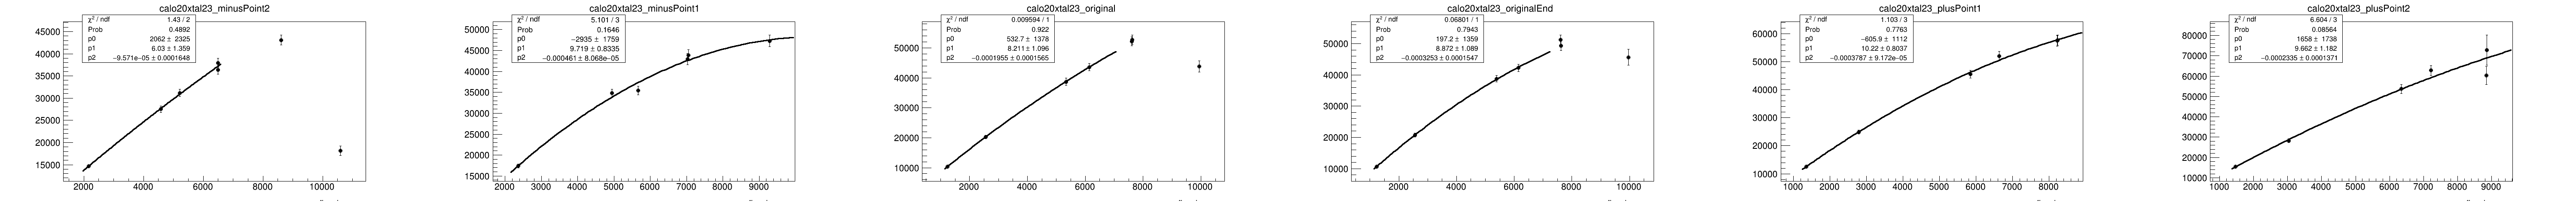

In [96]:
c = r.TCanvas("c","c",1000*len(graphs),500)
c.Divide(len(graphs))
for j in range(2):
    for i, gri in enumerate(graphs):
        c.cd(i+1)
        gri.Draw("ap")
        try:
            statsi = gri.FindObject("stats")
            statsi.SetX1NDC(0.15)
            statsi.SetX2NDC(0.45)
            #statsi.SetY1NDC(0.15)
            #statsi.SetY2NDC(0.15)
        except:
            continue
    c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


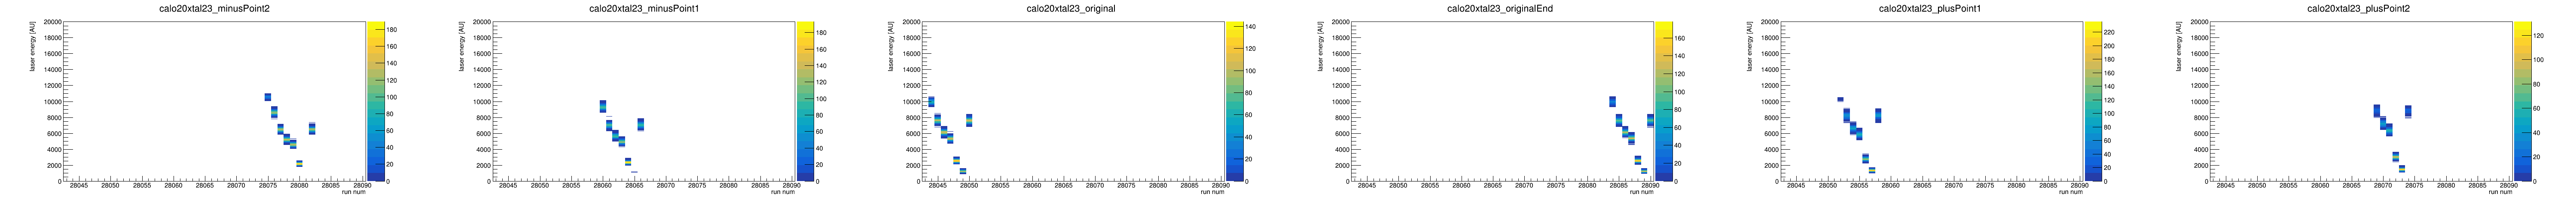

In [97]:
c = r.TCanvas("c","c",1000*len(graphs),500)
c.Divide(len(graphs))
for j in range(2):
    for i, gri in enumerate(graphs2):
        c.cd(i+1)
        gri.Draw("colz")
    c.Draw()